In [1]:
%load_ext autoreload
%autoreload 2
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd

In [3]:
cd ../

/home/lincolnzjx/Desktop/Interpretation


In [4]:
pwd

'/home/lincolnzjx/Desktop/Interpretation'

In [5]:
def main(cuda, exp, alpha, beta, gamma, selected_layer, selected_filter,
         class_index, num_class, re_size, dataset, backbone, img_index, mode,
         inter, defensed):
    resume = "037-0"
    server = 'desktop'
    n_epochs = 10000
    seed = -1
    eval_frequency = 50
    delta = 0
    batch_size = 1 if mode else num_class
    lr = 1
    
    !CUDA_VISIBLE_DEVICES=$cuda python -u -W ignore src/trainer.py \
        --experiment_index $exp\
        --alpha=$alpha \
        --gamma=$gamma \
        --beta=$beta \
        --selected_layer=$selected_layer \
        --selected_filter=$selected_filter \
        --num_class=$num_class \
        --class_index=$class_index \
        --server $server\
        --dataset $dataset\
        --n_epochs $n_epochs \
        --eval_frequency=$eval_frequency \
        --re_size $re_size \
        --backbone=$backbone \
        --optimizer=SGD \
        --learning_rate $lr \
        --delta=$delta \
        --resume $resume \
        --mode=keep \
        --inter=False \
        --regularization=L1 \
        --seed $seed \
        --img_index $img_index\
        --batch_size $batch_size\
        --inter $inter\
        --defensed $defensed

# Read From excel

In [6]:
excel_path = "./src/exps.xlsx"
sheet = "ImageNet"
excepts = []

# ALL YOU NEED TO SET HERE!!

In [7]:
exp_index = "x091800"

# Main

In [8]:
xlsx = pd.ExcelFile(excel_path)
excel = pd.read_excel(xlsx, sheet, dtype={"exp": str, 
                                          "Done": str,
                                          "selected_layer": int,
                                          "selected_filter": int, 
                                          "Alpha": int,
                                          "Beta": int,
                                          "Gamma": int,
                                          "cuda": int,
                                          "class_index": int,
                                          "num_class": int,
                                          "re_size": int,
                                          "dataset": str,
                                          "backbone": str, 
                                          "mode":str}).values

for data in excel:
    exp, done, selected_layer, selected_filter, alpha, beta, gamma, cuda, \
        class_index, num_class, re_size, dataset, backbone, mode, inter, \
        defensed = data
    if exp != exp_index:
        continue
        
    exp = exp.replace("x", "")
    if exp in excepts:
        print("=> Skip")
    else:
        if done == "N":
            for img_index in range(30):
                if img_index == 2:
                    print("=> RUN on ", cuda, exp, selected_layer, selected_filter, 
                          class_index, "img_index ", img_index)
                    main(cuda, exp, alpha, beta, gamma, selected_layer, 
                         selected_filter, class_index, num_class, re_size, dataset,
                         backbone, img_index, mode, inter, defensed)

=> RUN on  0 091800 1 16 950 img_index  2
==================== basic setting start ====================
experiment_index    : 091800
cuda                : 0
num_workers         : 2
dataset             : ImageNet
data_dir            : /media/lincolnzjx/HardDisk/Datasets/
resume              : 037-0
n_epochs            : 10000
learning_rate       : 1.0
batch_size          : 1
seed                : -1
eval_frequency      : 50
log_dir             : ./saved/logdirs
model_dir           : ./saved/models
generated_dir       : ./saved/generated
eps                 : 1e-07
weight_decay        : 0.0001
momentum            : 0.9
input_size          : 224
backbone            : vgg16
re_size             : 224
optimizer           : SGD
warmup_epochs       : -1
initialization      : default
prof                : False
print_freq          : 10
selected_filter     : 16
selected_layer      : 1
alpha               : 100.0
beta                : 1.0
gamma               : 1.0
class_index         : [950]
num_

# Visualization

In [9]:
import pickle

In [12]:
# statistic_path = "/home/lincolnzjx/Desktop/Interpretation/saved/generated/091800/n07747607_10061_statistics.pl"
# statistic_path = "/home/lincolnzjx/Desktop/Interpretation/saved/generated/091800/n07747607_1021_statistics.pl" statistic_path = "/home/lincolnzjx/Desktop/Interpretation/saved/generated/091800/n07747607_1021_statistics.pl"
# statistic_path = "/home/lincolnzjx/Desktop/Interpretation/saved/generated/091800/n07747607_10068_statistics.pl"
statistic_path = "/home/lincolnzjx/Desktop/Interpretation/saved/generated/091800/n07747607_10110_statistics.pl"

In [13]:
with open(statistic_path, "rb") as handle:
    statistic = pickle.load(handle)

sf: min:0.000 max:0.000
rf: min:0.263 max:0.389
rfi: min:0.002 max:0.007
rg: min:0.433 max:1.359
rmse: min:0.000 max:0.017
ssim_sel: min:0.999, max:1.000
ssim_res: min:0.967, max:0.977
--------------------------------------------------
loss 0.741558313369751
epoch 4079
selected_filter_loss 0.0002871909528039396
rest_fileter_loss 0.27983930706977844
regularization_loss 0.43299993872642517
rest_filter_loss_interact 0.0015943862963467836
metric_statistic defaultdict(<class 'list'>, {'rmses_mean': 0.016946709, 'rmses_std': 0.0, 'ssim_sel_mean': 0.999438, 'ssim_sel_std': 0.0, 'ssim_res_mean': 0.97554475, 'ssim_res_std': 0.0, 'ssim_sum': 0.0})


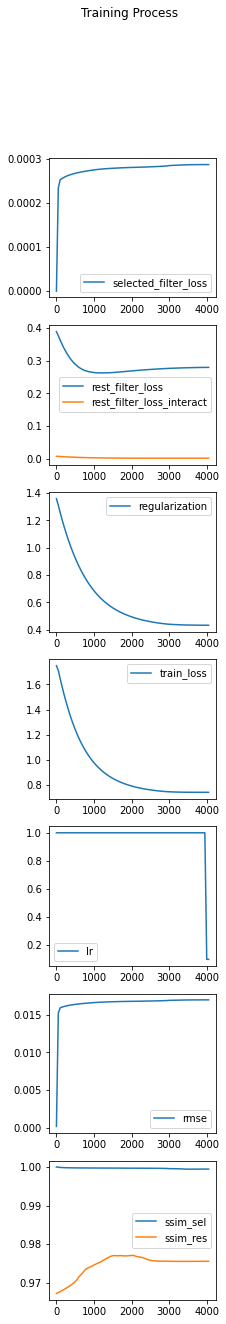

In [14]:
epoch = statistic["epoch"]
loss = statistic["losses"]
selected_filter_loss = statistic["selected_filter_loss"]
rest_filter_loss = statistic["rest_fileter_loss"]
rest_filter_loss_interact = statistic["rest_filter_loss_interact"]
regularization_loss = statistic["regularization_loss"]
lr = statistic["lr"]
best = statistic["best"][0]

metric_statistic = statistic["metric_statistic"]
rmses_mean = [ms["rmses_mean"] for ms in metric_statistic]
ssim_sel_mean = [ms["ssim_sel_mean"] for ms in metric_statistic]
ssim_res_mean = [ms["ssim_res_mean"] for ms in metric_statistic]

print("sf: min:{:.3f} max:{:.3f}".format(min(selected_filter_loss), max(selected_filter_loss)))
print("rf: min:{:.3f} max:{:.3f}".format(min(rest_filter_loss), max(rest_filter_loss)))
print("rfi: min:{:.3f} max:{:.3f}".format(min(rest_filter_loss_interact), max(rest_filter_loss_interact)))
print("rg: min:{:.3f} max:{:.3f}".format(min(regularization_loss), max(regularization_loss)))
print("rmse: min:{:.3f} max:{:.3f}".format(min(rmses_mean), max(rmses_mean)))
print("ssim_sel: min:{:.3f}, max:{:.3f}".format(min(ssim_sel_mean), max(ssim_sel_mean)))
print("ssim_res: min:{:.3f}, max:{:.3f}".format(min(ssim_res_mean), max(ssim_res_mean)))
print("-"*50)
for key, name in best.items():
    if key != "processed_images":
        print(key, name)


fig = plt.figure(figsize=(3, 21))
fig.add_axes(sharex=True)
# plt.xlim((0, max(epoch)+1))

ax = plt.subplot(711)
plt.plot(epoch, selected_filter_loss, label="selected_filter_loss")
plt.legend(loc='best')

plt.subplot(712)
plt.plot(epoch, rest_filter_loss, label="rest_filter_loss")
plt.plot(epoch, rest_filter_loss_interact, label="rest_filter_loss_interact")
plt.legend(loc='best')

plt.subplot(713)
plt.plot(epoch, regularization_loss, label="regularization")
plt.legend(loc='best')

plt.subplot(714)
plt.plot(epoch, loss, label="train_loss")
plt.legend(loc='best')

plt.subplot(715)
plt.plot(epoch, lr, label="lr")
plt.legend(loc='best')

plt.subplot(716)
plt.plot(epoch, rmses_mean, label="rmse")
plt.legend(loc='best')

plt.subplot(717)
plt.plot(epoch, ssim_sel_mean, label="ssim_sel")
plt.plot(epoch, ssim_res_mean, label="ssim_res")
plt.legend(loc='best')

plt.suptitle('Training Process')
plt.show()